In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.metrics import mean_squared_error

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder

from category_encoders import OneHotEncoder

from sklearn.pipeline import make_pipeline
import sklearn
sklearn.set_config(display = 'diagram')
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
pd.options.display.max_rows = None

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [30]:
df['MS SubClass'] = df['MS SubClass'].astype('object')
df['Bsmt Qual'] = df['Bsmt Qual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Mas Vnr Area'] = df['Mas Vnr Area'].replace(np.nan, 0)

In [32]:
df = df[df['Total Bsmt SF'].notna()]
df = df[df['Garage Area'].notna()]

In [394]:
df = df[df['Gr Liv Area'] < 4000]

In [446]:
X = df[['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built', 'Neighborhood', 'Garage Area', 'MS SubClass']]
y = df['SalePrice']
# X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Roof Matl', 'Land Contour', 'Neighborhood', 'Bsmt Qual', 'Misc Val']]

In [257]:
# plt.figure(figsize = (15, 10))
# sns.heatmap(X.corr(), annot = True);

In [258]:
# poly = PolynomialFeatures(interaction_only = True)
# X_poly = poly.fit_transform(X)
# pd.options.display.max_columns = None
# pd.DataFrame(X_poly).head()

In [416]:
ohe = OneHotEncoder(use_cat_names = True)

In [417]:
X_encoded = ohe.fit_transform(X)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [418]:
model = sm.OLS(y, X_encoded).fit()

In [419]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     281.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:09:55   Log-Likelihood:                -23879.
No. Observations:                2047   AIC:                         4.786e+04
Df Residuals:                    1997   BIC:                         4.814e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gr Liv Area             53.5613      2.448     21.876      0.000      48.760      58.363
Overall Qual          1.564e+04    828.583     18.876      0.000     1.4e+04    1.73e+04
Screen Porch            83.7673     11.375      7.364      0.000      61.459     106.076
Lot Area                 0.8963      0.119      7.561      0.000       0.664       1.129
Total Bsmt SF           28.0383      2.477     11.321      0.000      23.181      32.895
Year Built             530.3369     60.073      8.828      0.000     412.525     648.149
Neighborhood_Sawyer  -4.093e+05   4.22e+04     -9.703      0.000   -4.92e+05   -3.27e+05
Neighborhood_SawyerW -4.191e+05   4.34e+04     -9.656      0.000   -5.04e+05   -3.34e+05
Neighborhood_NAmes   -4.122e+05   4.19e+04     -9.849      0.000   -4.94e+05    -3.3e+05
Neighborhood_Timber  -4.026e+05   4.36e+04     -9.238      0.000   -4.88e+05   -3.17e+05
Neighborhood_Edwards -4.099e+05   4.22e+04     -9.720      0.000   -4.93e+05   -3.27e+05
Neighborhood_OldTown -4.117e+05   4.12e+04     -9.983      0.000   -4.93e+05   -3.31e+05
Neighborhood_BrDale  -3.949e+05   4.25e+04     -9.297      0.000   -4.78e+05   -3.12e+05
Neighborhood_CollgCr -4.153e+05   4.36e+04     -9.529      0.000   -5.01e+05    -3.3e+05
Neighborhood_Somerst -3.992e+05   4.37e+04     -9.134      0.000   -4.85e+05   -3.14e+05
Neighborhood_Mitchel -4.135e+05    4.3e+04     -9.614      0.000   -4.98e+05   -3.29e+05
Neighborhood_StoneBr -3.448e+05   4.34e+04     -7.949      0.000    -4.3e+05    -2.6e+05
Neighborhood_NridgHt -3.623e+05   4.36e+04     -8.307      0.000   -4.48e+05   -2.77e+05
Neighborhood_Gilbert -4.189e+05   4.37e+04     -9.590      0.000   -5.05e+05   -3.33e+05
Neighborhood_Crawfor -3.841e+05   4.22e+04     -9.103      0.000   -4.67e+05   -3.01e+05
Neighborhood_IDOTRR  -4.107e+05   4.17e+04     -9.856      0.000   -4.92e+05   -3.29e+05
Neighborhood_NWAmes  -4.249e+05   4.25e+04     -9.992      0.000   -5.08e+05   -3.41e+05
Neighborhood_Veenker -3.952e+05   4.32e+04     -9.157      0.000    -4.8e+05   -3.11e+05
Neighborhood_MeadowV -3.909e+05   4.25e+04     -9.201      0.000   -4.74e+05   -3.08e+05
Neighborhood_SWISU   -4.128e+05    4.2e+04     -9.838      0.000   -4.95e+05   -3.31e+05
Neighborhood_NoRidge -3.831e+05   4.34e+04     -8.828      0.000   -4.68e+05   -2.98e+05
Neighborhood_ClearCr -4.042e+05    4.3e+04     -9.400      0.000   -4.89e+05    -3.2e+05
Neighborhood_Blmngtn -4.003e+05    4.4e+04     -9.087      0.000   -4.87e+05   -3.14e+05
Neighborhood_BrkSide -4.019e+05   4.18e+04     -9.610      0.000   -4.84e+05    -3.2e+05
Neighborhood_NPkVill     -4e+05   4.26e+04     -9.397      0.000   -4.84e+05   -3.17e+05
Neighborhood_Blueste -3.972e+05   4.39e+04     -9.055      0.000   -4.83e+05   -3.11e+05
Neighborhood_GrnHill -2.876e+05   4.75e+04     -6.055    

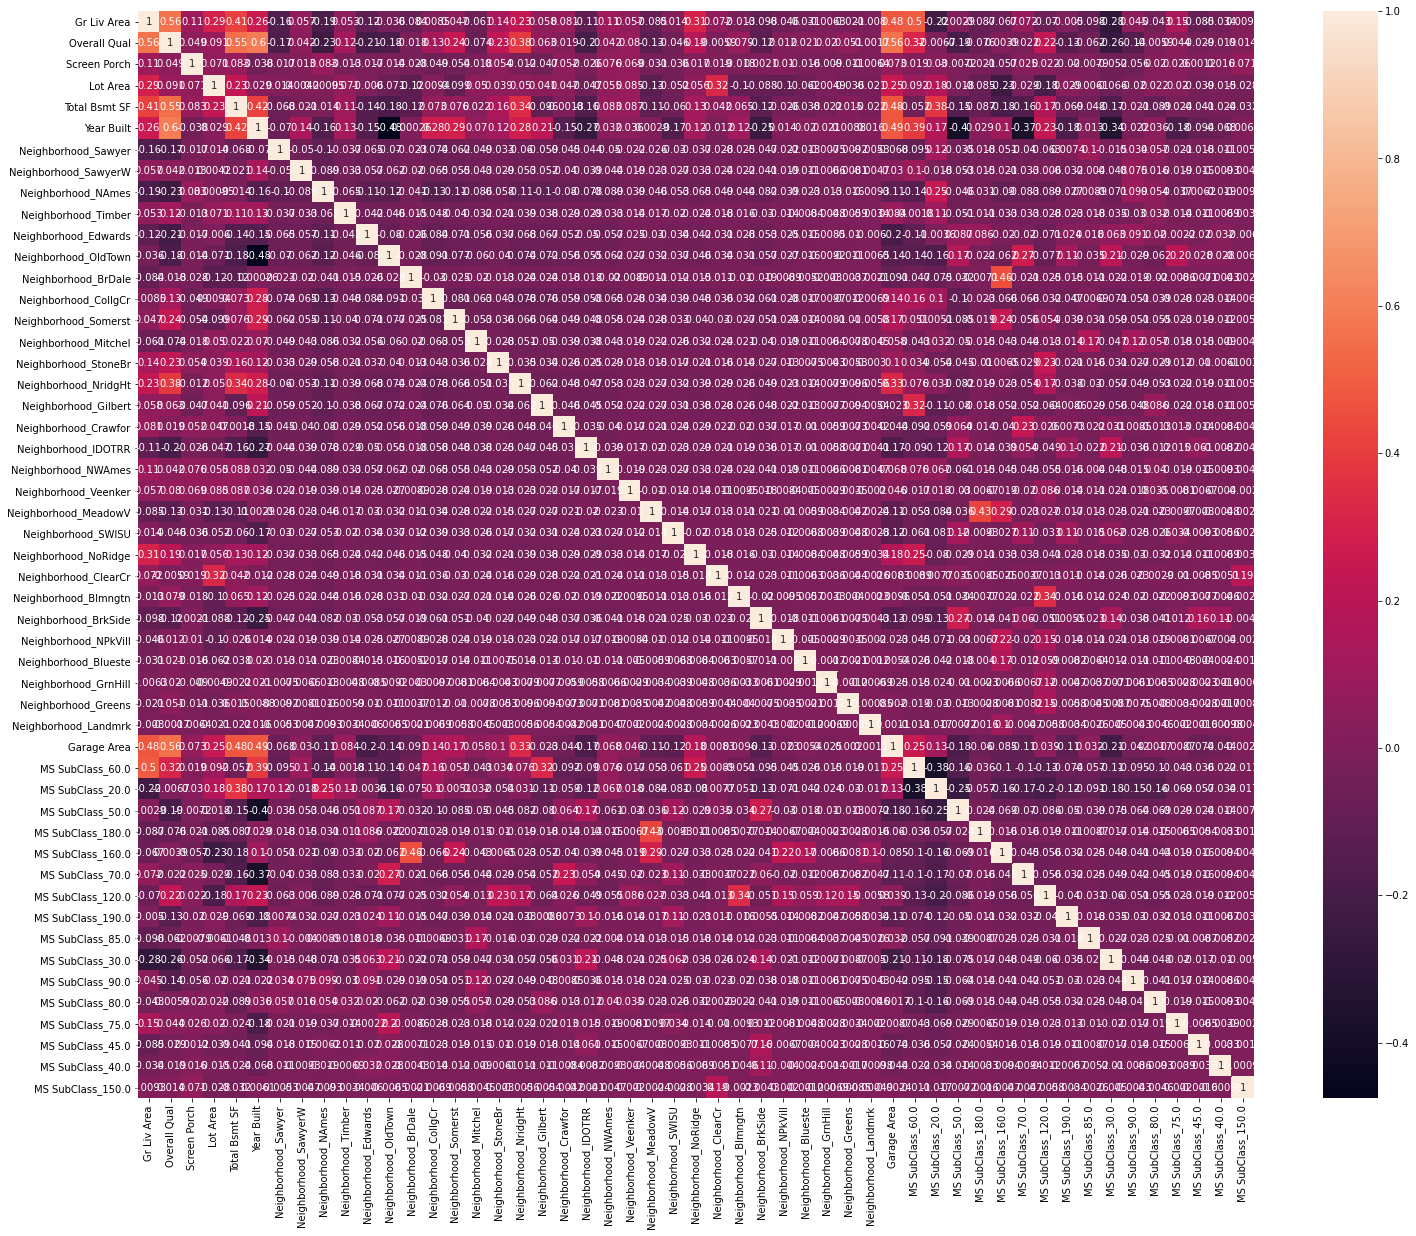

In [420]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_encoded.corr(), annot = True);

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [448]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(), StandardScaler(), ElasticNet())
pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [449]:
params = {
    'polynomialfeatures__interaction_only': [True, False],
    'elasticnet__alpha': [.1, 1, 10, 100]
}

In [454]:
gs = GridSearchCV(pipe, params, n_jobs = -1) 

In [455]:
gs.fit(X, y)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Lindsey\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562070750241.7789, tolerance: 1286605500.408653
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.1, 1, 10, 100],
                         'polynomialfeatures__interaction_only': [True, False]})

In [456]:
gs.best_params_

{'elasticnet__alpha': 0.1, 'polynomialfeatures__interaction_only': False}

In [457]:
pd.DataFrame(gs.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_polynomialfeatures__interaction_only,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,3.526289,0.178444,0.082753,0.010179,0.1,False,"{'elasticnet__alpha': 0.1, 'polynomialfeatures...",0.884534,0.908061,0.901458,0.860903,0.897483,0.890488,0.016666,1
0,2.988037,0.028063,0.066387,0.012582,0.1,True,"{'elasticnet__alpha': 0.1, 'polynomialfeatures...",0.884909,0.906932,0.901091,0.862143,0.896548,0.890324,0.015837,2
3,2.183118,0.198300,0.074993,0.011691,1,False,"{'elasticnet__alpha': 1, 'polynomialfeatures__...",0.888188,0.902014,0.892988,0.870986,0.884233,0.887682,0.010242,3
2,1.690868,0.092784,0.079316,0.009845,1,True,"{'elasticnet__alpha': 1, 'polynomialfeatures__...",0.888157,0.897125,0.889668,0.869734,0.881563,0.885249,0.009201,4
5,0.562484,0.024452,0.071873,0.007657,10,False,"{'elasticnet__alpha': 10, 'polynomialfeatures_...",0.844380,0.844795,0.837582,0.833140,0.822238,0.836427,0.008327,5
4,0.615587,0.015933,0.078116,0.009884,10,True,"{'elasticnet__alpha': 10, 'polynomialfeatures_...",0.829793,0.826577,0.819684,0.817903,0.806040,0.819999,0.008228,6
7,0.468719,0.039529,0.046873,0.017116,100,False,"{'elasticnet__alpha': 100, 'polynomialfeatures...",0.430250,0.434996,0.429530,0.440307,0.415084,0.430034,0.008414,7
6,0.456214,0.011695,0.062497,0.000003,100,True,"{'elasticnet__alpha': 100, 'polynomialfeatures...",0.380352,0.384456,0.378970,0.390249,0.367717,0.380349,0.007434,8


In [458]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(interaction_only=True), StandardScaler(), ElasticNet(alpha = .01))
pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.01))])

In [459]:
pipe.fit(X_train, y_train)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Lindsey\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350497869669.70435, tolerance: 966678333.1710724
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'MS SubClass'],
                               use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.01))])

In [428]:
# pipe_rfe = pipe.named_steps['rfe'].support_
# pipe_rfe

In [429]:
# pd.DataFrame(pipe_rfe, pipe.named_steps['polynomialfeatures'].get_feature_names())

In [460]:
pipe.score(X_train, y_train)

0.931083378611838

In [461]:
pipe.score(X_test, y_test)

0.8689077310676743

In [462]:
preds = pipe.predict(X_test)

In [463]:
mean_squared_error(preds, y_test, squared = False)

28620.559639665636

In [464]:
pipe.fit(X, y)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Lindsey\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492050759641.9775, tolerance: 1286605500.408653
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'MS SubClass'],
                               use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.01))])

In [465]:
pipe.score(X, y)

0.927566394667892

In [466]:
preds = pipe.predict(X)

In [467]:
mean_squared_error(preds, y, squared = False)

21337.023314451446

Model 8 = 19829 on X, y<br>
26671 on X_train, y_train

In [468]:
df_test = pd.read_csv('../datasets/test.csv')
df_test['MS SubClass'] = df_test['MS SubClass'].astype('object')
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_test['Mas Vnr Area'] = df_test['Mas Vnr Area'].replace(np.nan, 0)
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [469]:
X_test = df_test[['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built', 'Neighborhood', 'Garage Area', 'MS SubClass']]
X_test.shape

(878, 7)

In [470]:
predictions = pipe.predict(X_test)
predictions.shape

(878,)

In [471]:
df_sales = pd.DataFrame(predictions, columns = ['SalePrice'])
df_sales.shape

(878, 1)

In [472]:
df_model10 = pd.concat([df_test['Id'], df_sales], axis = 1)
df_model10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


In [473]:
df_model10.set_index('Id', inplace = True)

In [474]:
df_model10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  878 non-null    float64
dtypes: float64(1)
memory usage: 13.7 KB


In [475]:
df_model10.to_csv('../submissions/model10_submission.csv')

Used: 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Roof Matl', 'Land Contour', 'Neighborhood', 'Bsmt Qual', 'Misc Val'<br>
Converted 'Bsmt Qual' to 0-5

pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(interaction_only = True), StandardScaler(), Ridge(alpha = 100))